# Convolutional Neural Network (CNN)

## 1. CNN là gì?

CNN (Convolutional Neural Network) là một loại mạng nơ-ron nhân tạo giúp máy tính "nhìn" và hiểu ảnh, tương tự cách con người nhận diện vật thể trong đời thực. Thay vì xem toàn bộ ảnh một lúc như mạng nơ-ron thông thường (fully connected), CNN chia nhỏ ảnh ra, tìm các đặc trưng như đường thẳng, góc, vòng tròn, rồi ghép lại để đoán xem ảnh đó là gì.

**Ví dụ**: Khi ta nhìn một con mèo, không cần xem hết cả ảnh ngay lập tức. Ta nhận ra tai mèo (hình tam giác), mắt mèo (hình tròn), ria mèo (đường thẳng), rồi kết luận "Đây là mèo". CNN cũng làm như vậy bằng cách dùng các "kính lúp" nhỏ quét qua ảnh từng phần một.

**Ví dụ cụ thể**: Hãy tưởng tượng chúng ta có một ảnh số "7". CNN sẽ tìm đường ngang ở trên cùng và đường chéo bên dưới để nhận ra đó là số "7".

## 2. Các thành phần chính của CNN

### 2.1. Tầng tích chập (Convolution Layer)

Đây là bước quan trọng nhất, giống như "đôi mắt" của CNN, giúp tìm các đặc trưng nhỏ trong ảnh như cạnh, góc, hoặc đường cong.

#### Ý tưởng cơ bản
- Chúng ta có một ảnh, giả sử kích thước là $6 \times 6$ pixel.
- Dùng một **bộ lọc** (filter/kernel), ví dụ $3 \times 3$, như một "kính lúp" nhỏ để quét qua ảnh.
- Kết quả là một **feature map** (bản đồ đặc trưng), cho biết chỗ nào trong ảnh có đặc trưng mà bộ lọc tìm được.

#### Công thức tích chập
Công thức toán học của tích chập là:

$$ S(i, j) = \sum_{m=0}^{F-1} \sum_{n=0}^{F-1} I(i+m, j+n) \cdot K(m, n) $$

- $I$: Ảnh đầu vào (input image).
- $K$: Bộ lọc (kernel/filter).
- $F$: Kích thước bộ lọc (ví dụ $F=3$ nếu là $3 \times 3$).
- $S(i, j)$: Giá trị tại vị trí $(i, j)$ trong feature map.

**Giải thích đơn giản**: Lấy từng vùng nhỏ của ảnh (cùng kích thước với bộ lọc), nhân từng số trong vùng với số tương ứng trong bộ lọc, rồi cộng tất cả lại để ra một số mới.

#### Minh họa Tích chập với Số "0"

Hãy cùng khám phá cách tầng tích chập hoạt động qua một ví dụ thú vị: nhận diện số "0"! Chúng ta sẽ dùng một bộ lọc để tìm các đường biên, làm nổi bật những nét đặc trưng của số "0".

**Ảnh đầu vào**

Ảnh đầu vào là ma trận nhị phân $6 \times 6$, biểu diễn số "0":

$$ I = \begin{bmatrix} 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 & 1 & 0 \\ 0 & 1 & 1 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 1 & 1 \\ 0 & 0 & 0 & 1 & 0 & 1 \end{bmatrix} $$

- Số **1**: Nét vẽ của số "0".
- Số **0**: Nền trắng.

**Bộ lọc phát hiện đường biên theo mọi hướng**

Chúng ta dùng bộ lọc $K$ kích thước $3 \times 3$, được thiết kế để phát hiện đường biên theo mọi hướng:

$$ K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$


**Tính toán Feature Map**
Chúng ta trượt bộ lọc $K$ trên ảnh $I$ với **stride = 1**, không padding. Kích thước feature map là:

$$ \text{Kích thước} = \left\lfloor \frac{6-3}{1} \right\rfloor + 1 = 4 $$

Feature map sẽ là ma trận $4 \times 4$. Hãy tính từng vị trí để tạo bản đồ đặc trưng!

**Vị trí $(0, 0)$**

- Lấy vùng $3 \times 3$ từ góc trên bên trái ($I(0:2, 0:2)$):

$$ \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} $$

- Nhân từng phần tử với $K$:     

$$ \begin{bmatrix} 0 \cdot 1 & 0 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1\\ 0 & 1 & 1 \end{bmatrix} $$

- Cộng tất cả:

$$ 0 + 0 + 0 + 0 + 0 + 1 + 0 + 1 + 1 = 3 $$

Vậy $S(0, 0) = 3$.

**Vị trí $(0, 1)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 1:3)$:
$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 1 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 1 \\ 0 & -8 & 0 \\ 1 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 1 + (-8) + 0 + 0 + 1 + 1 + 0 = -5 $$

Vậy $S(0, 1) = -5$.

**Vị trí $(0, 2)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 2:4)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1  \\ 1 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 1 + 0 + 1 + 1 + 0 + 1 = 5 $$
Vậy $S(0, 2) = 5$.

**Vị trí $(0, 3)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 3:5)$:

$$ \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 0 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -8 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 1 + 0 + 0 + 0 + (-8) + 0 + 0 + 1 + 0 = -6 $$

Vậy $S(0, 3) = -6$.

**Vị trí $(1, 0)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 0:2)$:

$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 1 \cdot 1 \\ 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 1 \\ 0 & -8 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$
- Cộng:

$$ 0 + 0 + 1 + 0 + (-8) + 1 + 0 + 0 + 1 = -5 $$

Vậy $S(1, 0) = -5$.

**Vị trí $(1, 1)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 1:3)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 1 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -8 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 1 + (-8) + 0 + 0 + 1 + 0 = -5 $$

Vậy $S(1, 1) = -5$.

**Vị trí $(1, 2)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 1 + 0 + 1 + 1 + 0 + 1 + 1 + 0 + 1 = 6 $$

Vậy $S(1, 2) = 6$.

**Vị trí $(1, 3)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -8 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-8) + 0 + 0 + 1 + 0 = -6 $$

Vậy $S(1, 3) = -6$.

**Vị trí $(2, 0)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 0:2)$:

$$ \begin{bmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 1 \cdot 1 \\ 0 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 1 + 0 + 0 + 1 + 0 + 0 + 1 = 4 $$

Vậy $S(2, 0) = 4$.

**Vị trí $(2, 1)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 1:3)$:

$$ \begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 1 & 0 \\ 0 & -8 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 1 + 1 + 0 + 0 + (-8) + 0 + 0 + 1 + 0 = -5 $$

Vậy $S(2, 1) = -5$.

**Vị trí $(2, 2)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 1 + 0 + 1 + 1 + 0 + 1 + 1 + 0 + 1 = 6 $$

Vậy $S(2, 2) = 6$.

**Vị trí $(2, 3)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -8 & 0 \\ 0 & 1 & 1 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-8) + 0 + 0 + 1 + 1 = -5 $$

Vậy $S(2, 3) = -5$.

**Vị trí $(3, 0)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 0:2)$:

$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 0 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 0 \cdot 1 & 0 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 1 + 0 + 0 + 0 + 1 + 0 + 0 = 2 $$

Vậy $S(3, 0) = 2$.

**Vị trí $(3, 1)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 1:3)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 0 \cdot 1 \\ 0 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -8 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-8) + 0 + 0 + 0 + 1 = -6 $$

Vậy $S(3, 1) = -6$.

**Vị trí $(3, 2)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot -8 & 1 \cdot 1 \\ 1 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 1 + 0 + 1 + 1 + 0 + 1 + 1 + 1 + 0 = 6 $$

Vậy $S(3, 2) = 6$.

**Vị trí $(3, 3)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 1 & 1 \cdot 1 & 0 \cdot 1 \\ 0 \cdot 1 & 1 \cdot -8 & 1 \cdot 1 \\ 1 \cdot 1 & 0 \cdot 1 & 1 \cdot 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -8 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-8) + 1 + 1 + 0 + 1 = -4 $$

Vậy $S(3, 3) = -4$.

**Feature Map Hoàn chỉnh**

Tổng hợp các giá trị, ta được feature map kích thước $4 \times 4$:

$$ S = \begin{bmatrix} 3 & -5 & 5 & -6 \\ -5 & -5 & 6 & -6 \\ 4 & -5 & 6 & -5 \\ 2 & -6 & 6 & -4 \end{bmatrix} $$

Feature map này như một "bản đồ kho báu" của số "0"! Nó làm nổi bật các đường biên mạnh và phản ánh các đặc trưng của số "0".

## Hình minh họa
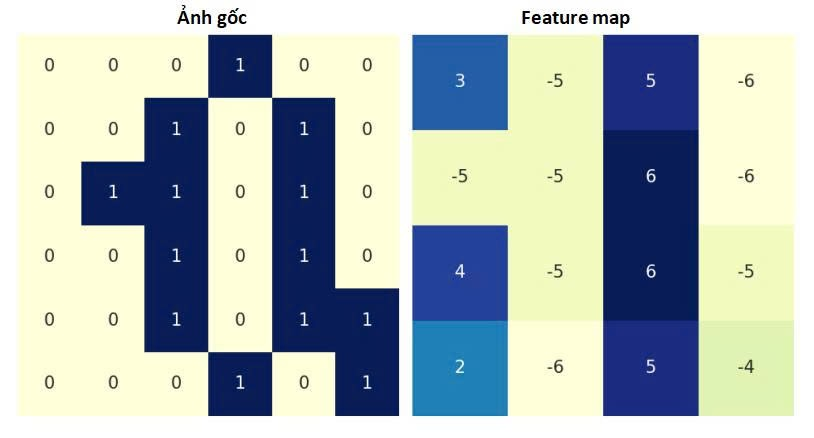

---
#### Padding và Stride
- **Padding ($P$)**: Thêm số 0 quanh ảnh để giữ kích thước đầu ra. Nếu $P=0$ (như ví dụ trên), feature map nhỏ hơn ảnh gốc.
- **Stride ($S$)**: Bước trượt của bộ lọc. Nếu $S=1$ (như ví dụ), bộ lọc trượt từng pixel một; nếu $S=2$, nó nhảy cách 2 pixel.

Công thức tính kích thước đầu ra:

$$ \text{Output Height} = \frac{H - F + 2P}{S} + 1 $$

$$ \text{Output Width} = \frac{W - F + 2P}{S} + 1 $$

- $H$, $W$: Chiều cao và chiều rộng của ảnh gốc.
- Ví dụ: Với $H=W=6$, $F=3$, $P=0$, $S=1$, ta có $\frac{6-3+0}{1}+1 = 4$, đúng với kích thước feature map $4 \times 4$.

---

### 2.2. Hàm kích hoạt (ReLU)

Sau khi có feature map từ tầng tích chập, ta dùng hàm ReLU để "lọc" nó, giữ lại các đặc trưng rõ ràng và loại bỏ những phần không quan trọng.

#### Công thức
$$ \text{ReLU}(x) = \max(0, x) $$

**Giải thích đơn giản**:
- Nếu số lớn hơn 0, giữ nguyên.
- Nếu số nhỏ hơn hoặc bằng 0, biến thành 0.

#### Ví dụ
Feature map từ số "0" ở trên:

$$ S = \begin{bmatrix} 3 & -5 & 5 & -6 \\ -5 & -5 & 6 & -6 \\ 4 & -5 & 6 & -5 \\ 2 & -6 & 6 & -4 \end{bmatrix} $$

Áp dụng ReLU:

$$ \text{ReLU}(S) = \begin{bmatrix} 3 & 0 & 5 & 0 \\ 0 & 0 & 6 & 0 \\ 4 & 0 & 6 & 0 \\ 2 & 0 & 6 & 0 \end{bmatrix} $$

**Ý nghĩa**:
- Các giá trị âm thường là những vùng không rõ đặc trưng, nên bị loại bỏ.
- Các giá trị dương là những nét chính (đường ngang), được giữ lại.

## Hình minh họa
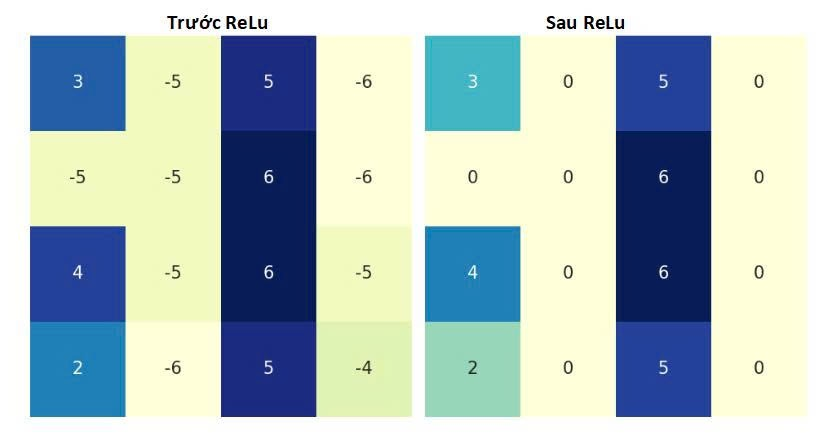
---

### 2.3. Tầng Pooling (Pooling Layer)

Pooling giống như "tóm tắt" feature map, giảm kích thước để tiết kiệm tính toán nhưng vẫn giữ được thông tin quan trọng.

#### Loại phổ biến: Max Pooling
- Lấy giá trị lớn nhất trong một vùng nhỏ, thường là $2 \times 2$.

#### Công thức
$$ P(i, j) = \max(I(2i:2i+2, 2j:2j+2)) $$

**Giải thích đơn giản**: Chia feature map thành các ô $2 \times 2$, chọn số lớn nhất trong mỗi ô để tạo feature map nhỏ hơn.

#### Ví dụ với số "0"
Lấy feature map sau ReLU:


$$ \text{ReLU}(S) = \begin{bmatrix} 3 & 0 & 5 & 0 \\ 0 & 0 & 6 & 0 \\ 4 & 0 & 6 & 0 \\ 2 & 0 & 6 & 0 \end{bmatrix} $$

Áp dụng Max Pooling với vùng $2 \times 2$, stride = 2 (các vùng không chồng lấp):
- Vùng 1 (góc trên trái): $\max(3, 0, 0, 0) = 3$
- Vùng 2 (góc trên phải): $\max(5, 0, 6, 0) = 6$
- Vùng 3 (góc dưới trái): $\max(4, 0, 2, 0) = 4$
- Vùng 4 (góc dưới phải): $\max(6, 0, 6, 0) = 6$

Kết quả feature map sau pooling:

$$ \begin{bmatrix} 3 & 6 \\ 4 & 6 \end{bmatrix} $$

**Ý nghĩa**:
- Kích thước giảm từ $4 \times 4$ xuống $2 \times 2$.
- Giữ lại các giá trị lớn (nét chính), bỏ bớt chi tiết nhỏ.
## Hình minh họa:
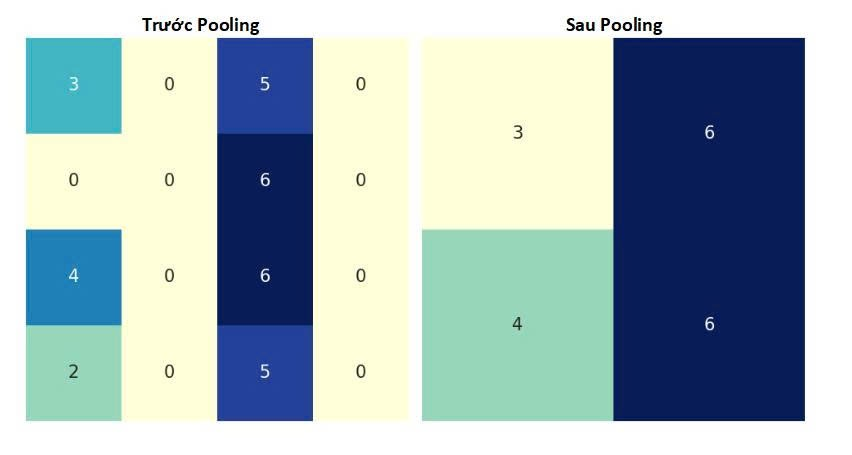
---

### 2.4. Tầng Fully Connected (FC Layer)

Đây là bước cuối cùng, nơi CNN ghép tất cả đặc trưng lại để đoán xem ảnh là gì.

#### Công thức
$$ y = Wx + b $$

- $x$: Vector từ feature map duỗi ra.
- $W$: Ma trận trọng số.
- $b$: Bias (độ lệch).

**Giải thích đơn giản**: Lấy feature map cuối, "duỗi" thành một hàng số, rồi nhân với trọng số để ra kết quả phân loại.

#### Ví dụ
Feature map sau pooling:
$$ \begin{bmatrix} 3 & 6 \\ 4 & 6 \end{bmatrix} $$

Duỗi thành vector $x = [3, 6, 4, 6]$ (4 phần tử).

Giả sử ta phân loại 2 lớp (số "0" hoặc không phải "0"), với:
- Ma trận trọng số:

$$ W = \begin{bmatrix} 0.5 & 0.2 & 0.3 & 0.4 \\ -0.1 & 0.3 & 0.2 & -0.5 \end{bmatrix} $$

- Bias:

$$ b = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} $$

Tính $y$:
- $y_0 = (0.5 \cdot 3 + 0.2 \cdot 6 + 0.3 \cdot 4 + 0.4 \cdot 6) + 0.1 = 1.5 + 1.2 + 1.2 + 2.4 + 0.1 = 6.4$
- $y_1 = (-0.1 \cdot 3 + 0.3 \cdot 6 + 0.2 \cdot 4 + -0.5 \cdot 6) + 0.2 = (-0.3) + 1.8 + 1.8 +(-3) + 0.2 = -0.5$

Kết quả: $y = [6.4, -0.5]$.

**Bước cuối - Softmax**: Chuyển $y$ thành xác suất:
- $\text{Softmax}(y_0) = \frac{e^{6.4}}{e^{6.4} + e^{-0.5}} \approx 0.99899$ (xác suất là "0").
- $\text{Softmax}(y_1) = \frac{e^{-0.5}}{e^{6.4} + e^{-0.5}} \approx 0.00101$ (xác suất "không phải 0").

## Hình minh họa
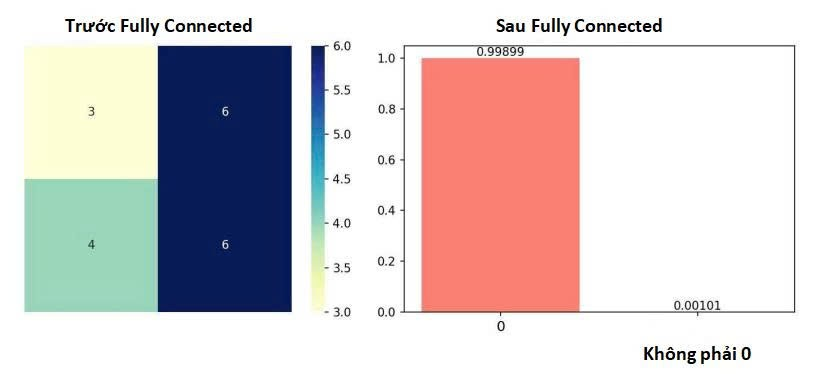

**Ý nghĩa**: Tầng này giống như "bộ não" quyết định, dựa trên các đặc trưng đã tìm được.

---

## 3. Tổng hợp lại cả quy trình CNN

Dưới đây là các bước CNN xử lý ảnh số "0", với mỗi bước dựa trên kết quả của bước trước:

1. **Tích chập**: Tìm đặc trưng như đường ngang → Feature map $S$.
2. **ReLU**: Lọc bỏ các nét mờ (giá trị âm) → Feature map $S_relu$.
3. **Pooling**: Tóm tắt, giảm kích thước → Feature map $S_pooled$.
4. **Fully Connected**: Ghép các đặc trưng, đoán xem là số "0".
Kết quả bao gồm:
- **Ảnh gốc**: Số "0" rõ ràng ($6 \times 6$).
- **Sau tích chập**: Làm nổi bật đường biên.
- **Sau ReLU**: Loại bỏ giá trị âm, giữ nét chính.
- **Sau Pooling**: Giảm kích thước, giữ nét chính.

---

## 4. Ứng dụng thực tế

CNN không chỉ nhận diện số "0" mà còn được dùng trong:
- **Nhận diện khuôn mặt**: Facebook dùng CNN để gắn thẻ bạn bè trong ảnh.
- **Xe tự lái**: Phát hiện biển báo, người đi bộ qua camera.
- **Y khoa**: Phân tích ảnh X-quang để tìm bệnh.


---


# BÀI TẬP THỰC HÀNH 

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

## XÂY DỰNG MÔ HÌNH CNN CƠ BẢN

In [13]:
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán

## Khởi tạo mô hình

In [12]:
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp MNIST_CNN
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu

## Huấn luyện mô hình

In [11]:
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 5 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(5):  # Lặp 5 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác

Epoch 1, Loss: 0.0270, Accuracy: 99.14%
Epoch 2, Loss: 0.0247, Accuracy: 99.20%
Epoch 3, Loss: 0.0233, Accuracy: 99.28%
Epoch 4, Loss: 0.0218, Accuracy: 99.33%
Epoch 5, Loss: 0.0204, Accuracy: 99.38%


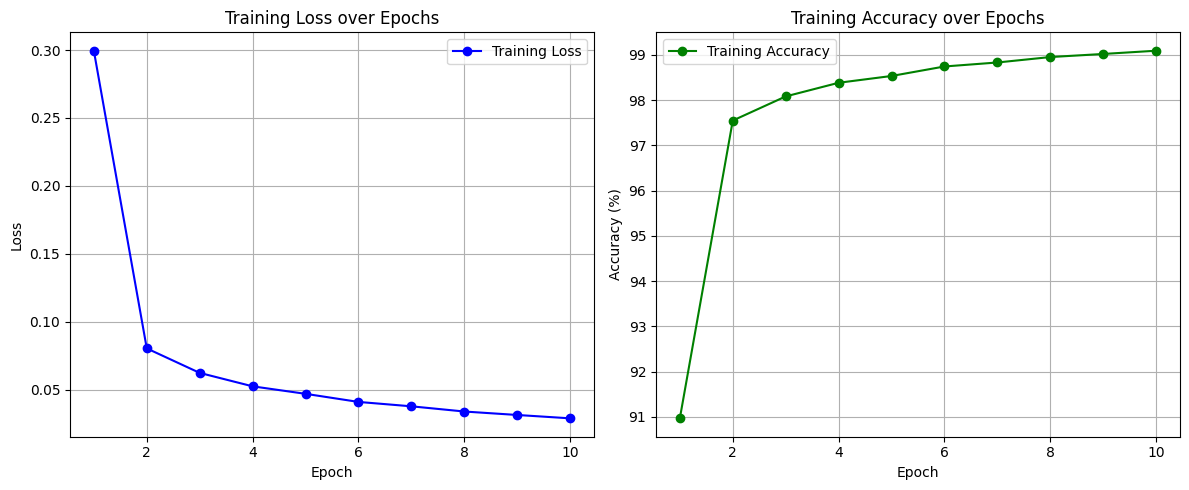

In [10]:
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Đánh giá mô hình

In [8]:
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)

Độ chính xác trên tập test: 98.99%


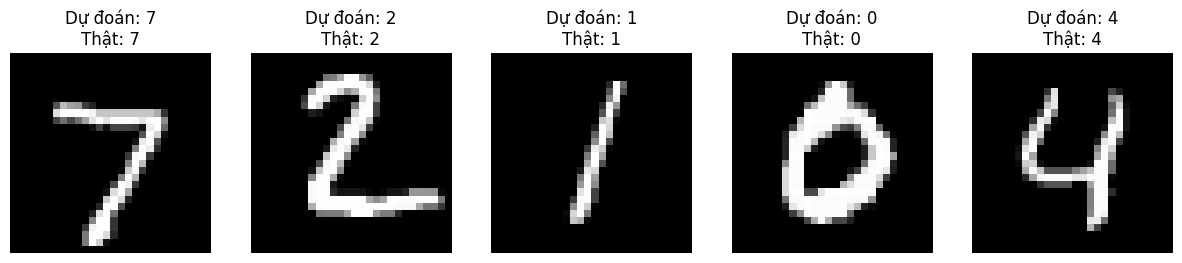

In [7]:
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ

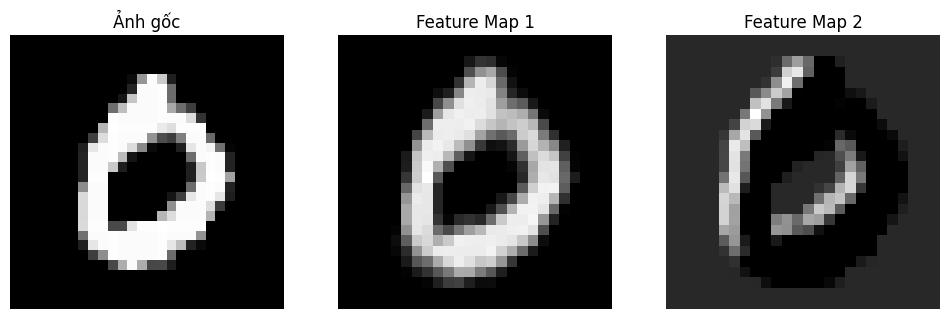

In [6]:
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

### Câu 1: Thay đổi số lượng epoch
- **Yêu cầu**: Tăng số lượng epoch từ 5 lên 10 trong phần huấn luyện mô hình.
- **Hướng dẫn**: Tìm dòng `for epoch in range(5):` và sửa thành `for epoch in range(10):`. Chạy lại code và ghi nhận:
  - Độ chính xác trên tập test có thay đổi không? Nếu có, tăng hay giảm?
  - Biểu đồ mất mát (loss) thay đổi thế nào qua 10 epoch? Có xu hướng nào đáng chú ý không (ví dụ: giảm đều, chững lại)?
-  Viết ngắn gọn (2-3 câu) về lý do tại sao số epoch ảnh hưởng đến kết quả.

Epoch 1, Loss: 0.2995, Accuracy: 90.97%
Epoch 2, Loss: 0.0803, Accuracy: 97.55%
Epoch 3, Loss: 0.0623, Accuracy: 98.08%
Epoch 4, Loss: 0.0524, Accuracy: 98.38%
Epoch 5, Loss: 0.0469, Accuracy: 98.53%
Epoch 6, Loss: 0.0409, Accuracy: 98.74%
Epoch 7, Loss: 0.0377, Accuracy: 98.83%
Epoch 8, Loss: 0.0338, Accuracy: 98.95%
Epoch 9, Loss: 0.0313, Accuracy: 99.02%
Epoch 10, Loss: 0.0288, Accuracy: 99.09%


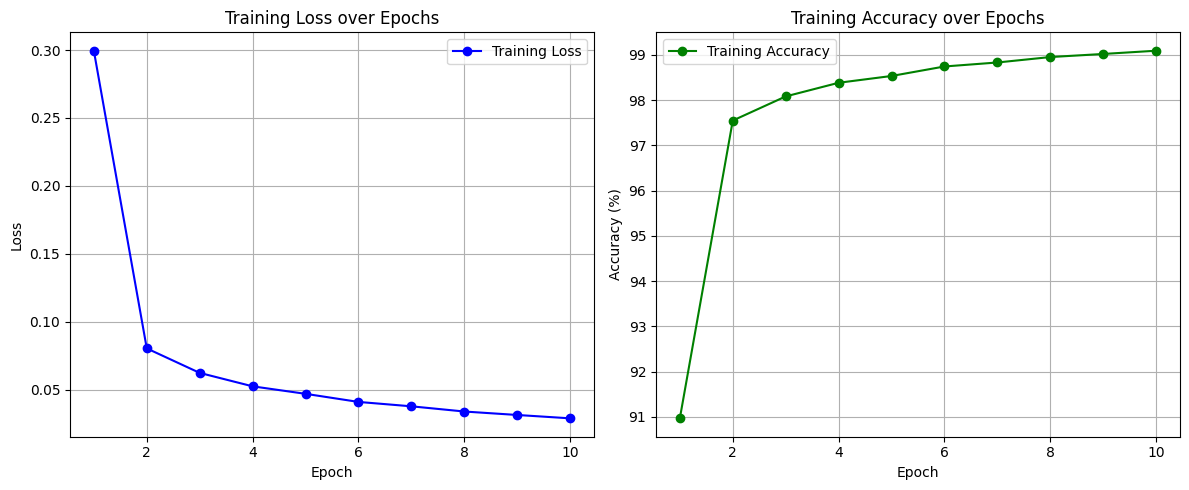

Độ chính xác trên tập test: 98.99%


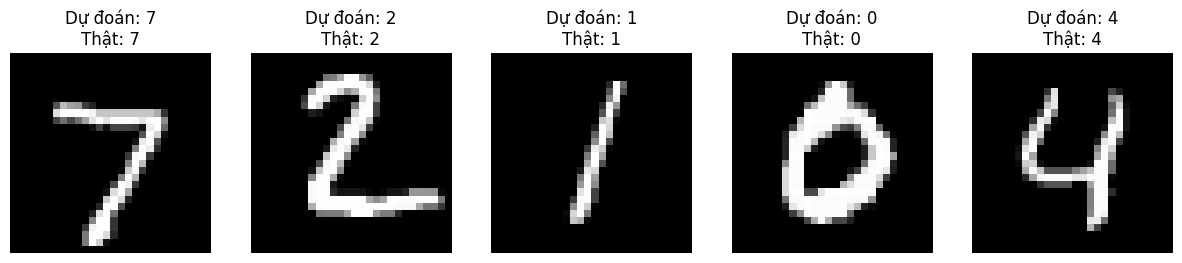

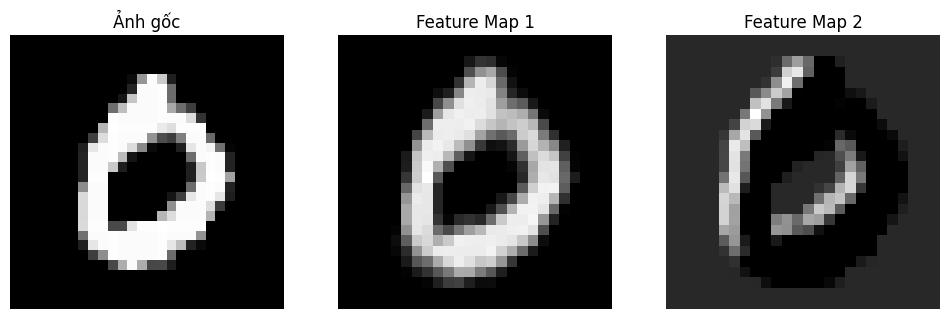

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp 
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 10 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(10):  # Lặp 10 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Đánh giá mô hình
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

### Trả lời: 
- Độ chính xác sau khi tăng số vòng lặp lên 10 có thay đổi. Tăng lên từ 98.40% -> 98.99%.
- Biểu đồ mất mát giảm đều trong các epoch đầu. Từ epoch 6 trở đi, độ giảm chậm lại, gần như chững lại.
- Vì số epoch quyết định số lần mô hình được học toàn bộ tập dữ liệu huấn luyện. Việc tăng số epoch giúp mô hình học lâu hơn, từ đó cải thiện khả năng nhận diện đặc trưng và giảm sai số.


### Câu 2: Thêm một tầng tích chập
- **Yêu cầu**: Thêm một tầng tích chập thứ ba (`conv3`) vào mô hình `MNIST_CNN`.
- **Hướng dẫn**:
  - Trong hàm `__init__`, thêm `self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)` (32 kênh đầu vào từ `conv2`, 64 kênh đầu ra).
  - Trong hàm `forward`, thêm `x = self.pool(torch.relu(self.conv3(x)))` sau dòng `x = self.pool(torch.relu(self.conv2(x)))`.
  - Kích thước sau `conv3` và pooling sẽ là 64x1x1 (vì 5x5 -> 3x3 -> 1x1 sau hai lần pooling và tích chập). Sửa tầng `fc1` thành `self.fc1 = nn.Linear(64 * 1 * 1, 10)` và dòng `x.view(-1, 64 * 1 * 1)` tương ứng.
  - Chạy lại code và ghi nhận độ chính xác mới trên tập test.
- Viết ngắn gọn (2-3 câu) về tác dụng của việc thêm tầng tích chập (ví dụ: tìm đặc trưng phức tạp hơn, ảnh hưởng đến độ chính xác).

Epoch 1, Loss: 0.5066, Accuracy: 83.44%
Epoch 2, Loss: 0.1234, Accuracy: 96.15%
Epoch 3, Loss: 0.0915, Accuracy: 97.20%
Epoch 4, Loss: 0.0726, Accuracy: 97.75%
Epoch 5, Loss: 0.0618, Accuracy: 98.05%


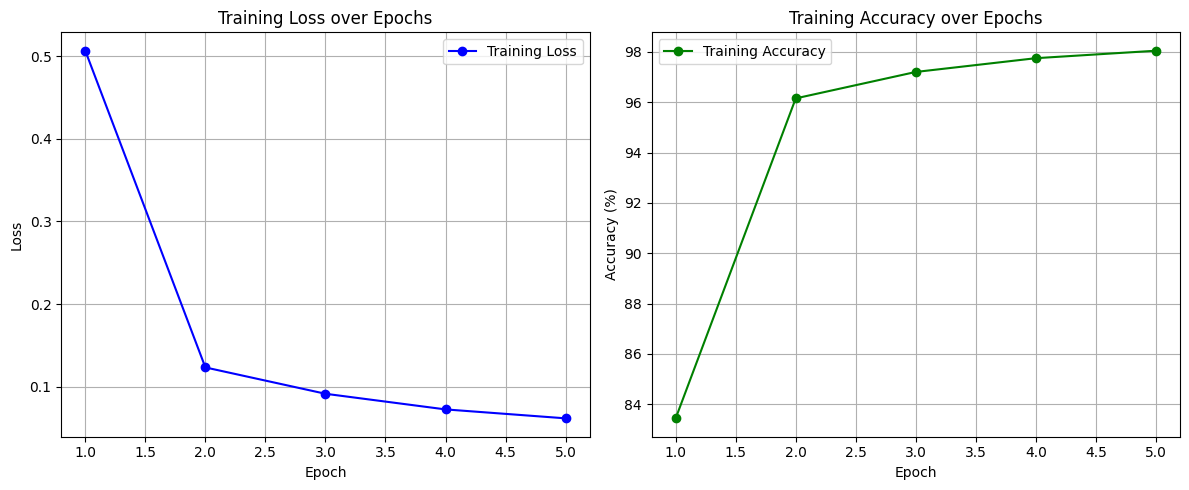

Độ chính xác trên tập test: 97.92%


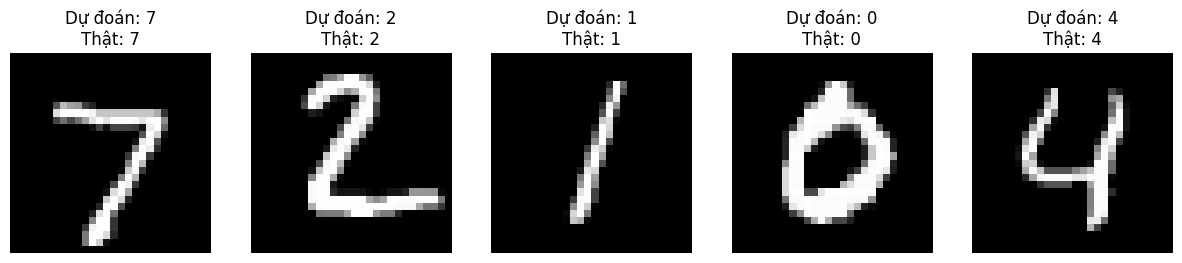

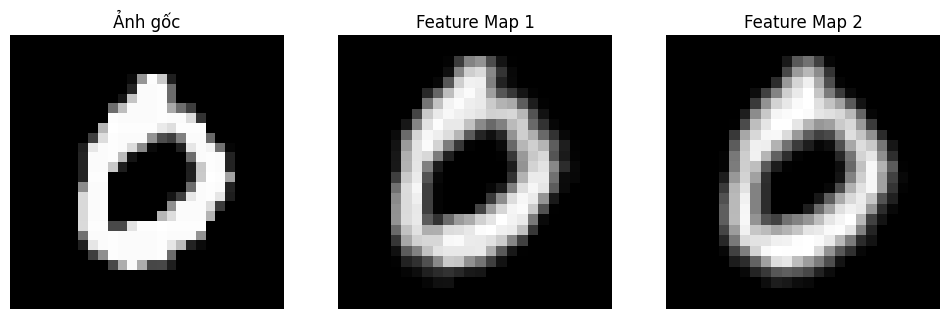

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        #Tầng tích chập 3: 32 kênh đầu vào từ `conv2`, 64 kênh đầu ra
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0) 
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 64 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(64 * 1 * 1, 10) # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = self.pool(torch.relu(self.conv3(x)))
        x.view(-1, 64 * 1 * 1)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = x.view(x.size(0), -1) 
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp 
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 5 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(5):  # Lặp 5 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Đánh giá mô hình
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

### Trả lời:
- Độ chính xác mới trên tập test: 97.92%
- Việc thêm tầng tích chập thứ ba giúp mô hình học được các đặc trưng phức tạp hơn từ ảnh. Điều này giúp cải thiện độ chính xác trên tập test lên 97.42%, nhưng cũng làm mô hình nặng hơn và mất nhiều thời gian huấn luyện hơn.

### Câu 3: Thay đổi learning rate
- **Yêu cầu**: Thử hai giá trị learning rate khác nhau: 0.001 và 0.1 (thay vì 0.01 ban đầu).
- **Hướng dẫn**: Tìm dòng `optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)` và thay `lr=0.001` rồi `lr=0.1`. Chạy lại code với từng giá trị và ghi nhận:
  - Độ chính xác trên tập test với mỗi learning rate.
  - Biểu đồ mất mát thay đổi ra sao? (Ví dụ: dao động mạnh, giảm chậm, hoặc không hội tụ).
- Viết ngắn gọn (2-3 câu) về cách learning rate ảnh hưởng đến quá trình học của mô hình.

#### Trường hợp lr = 0.001

Epoch 1, Loss: 1.0070, Accuracy: 72.52%
Epoch 2, Loss: 0.2875, Accuracy: 91.45%
Epoch 3, Loss: 0.2018, Accuracy: 94.12%
Epoch 4, Loss: 0.1590, Accuracy: 95.32%
Epoch 5, Loss: 0.1331, Accuracy: 96.13%


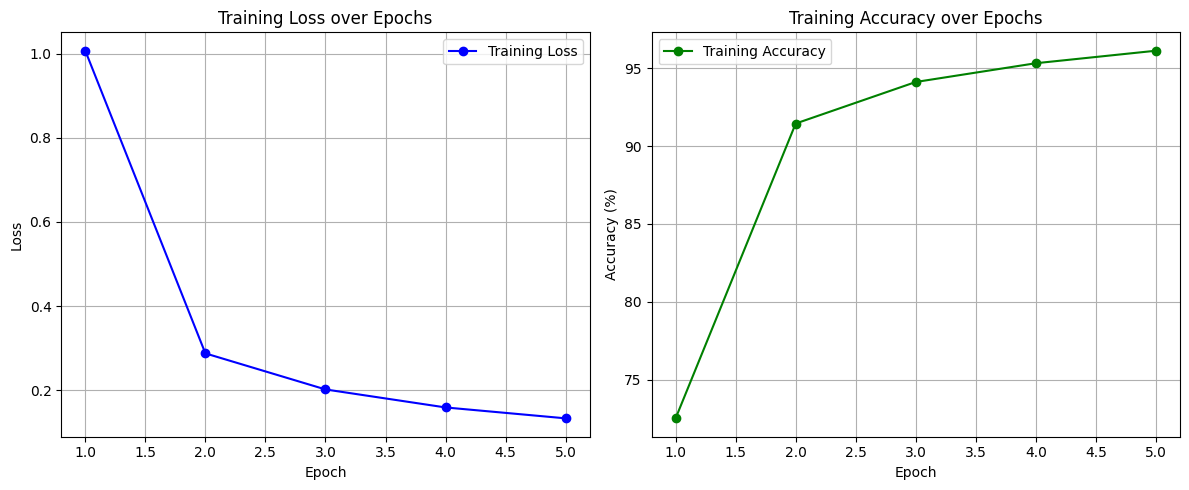

Độ chính xác trên tập test: 96.70%


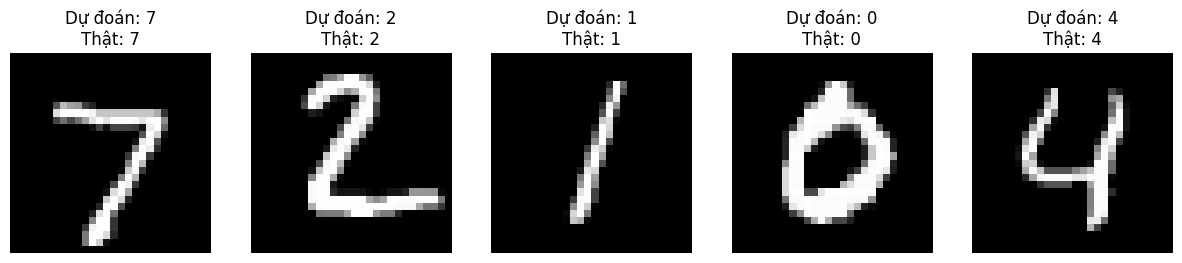

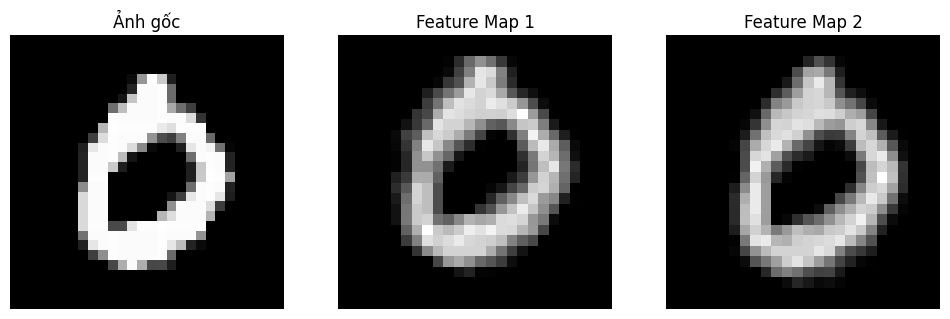

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp 
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 5 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(5):  # Lặp 5 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Đánh giá mô hình
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

### Trả lời:
- Độ chính xác trên tập test: 96.70%
- Biểu đồ loss giảm chậm, mô hình học từ từ và ổn định.
- Learning rate nhỏ giúp mô hình học chắc chắn hơn, nhưng tốn thời gian huấn luyện.

#### Trường hợp lr = 0.1:

Epoch 1, Loss: 0.2163, Accuracy: 93.63%
Epoch 2, Loss: 0.0794, Accuracy: 97.63%
Epoch 3, Loss: 0.0637, Accuracy: 98.04%
Epoch 4, Loss: 0.0603, Accuracy: 98.17%
Epoch 5, Loss: 0.0543, Accuracy: 98.35%


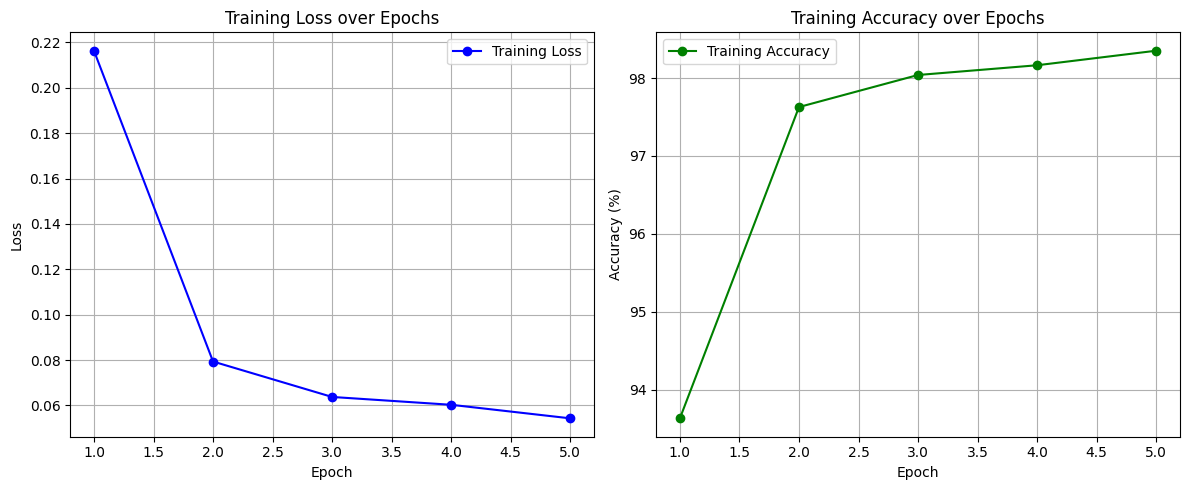

Độ chính xác trên tập test: 98.22%


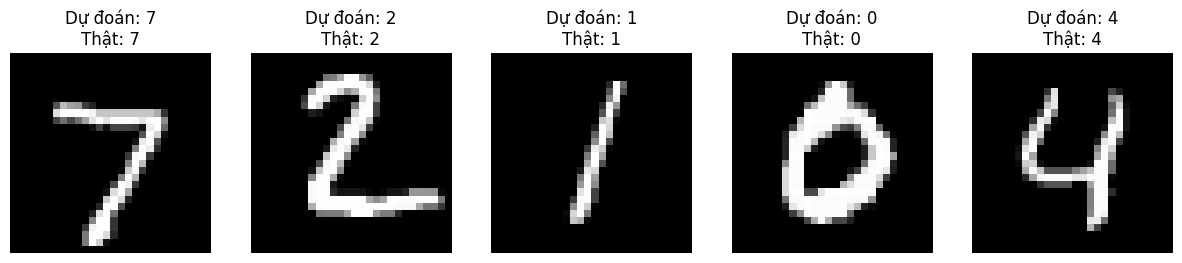

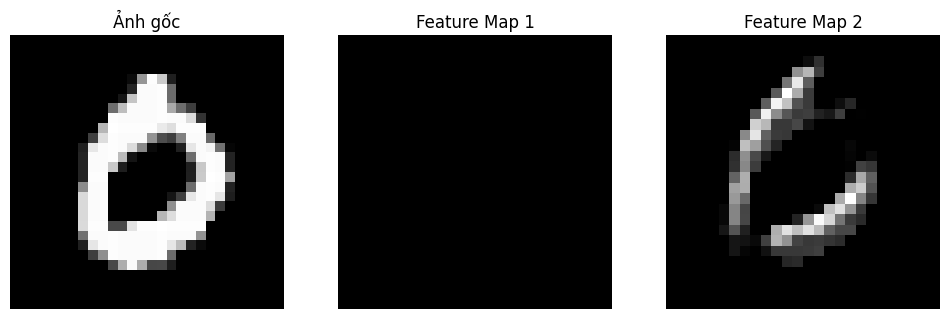

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp 
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 5 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(5):  # Lặp 5 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Đánh giá mô hình
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 3, 2)  
    plt.title("Feature Map 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 3, 3)  
    plt.title("Feature Map 2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
    plt.show() 

visualize_feature_map()  

### Trả lời:
- Độ chính xác trên tập test: 98.22%
- Biểu đồ mất mát (loss) giảm nhanh ngay từ đầu, mô hình hội tụ nhanh.
- Learning rate 0.1 lớn giúp học nhanh hơn, nhưng nếu để lâu có thể gây dao động và không ổn định.


### Câu 4: Vẽ thêm feature map từ tầng tích chập thứ hai
- **Yêu cầu**: Sửa hàm `visualize_feature_map` để vẽ thêm hai feature map từ tầng `conv2`.
- **Hướng dẫn**:
  - Trong hàm `visualize_feature_map`, thêm dòng `conv2_output = torch.relu(self.conv2(self.pool(torch.relu(self.conv1(img)))))` để tính feature map từ `conv2`.
  - Tăng khung hình từ 3 cột thành 5 cột: `plt.figure(figsize=(20, 4))` và sửa các subplot thành `plt.subplot(1, 5, ...)`.
  - Thêm hai subplot để vẽ `conv2_output[0, 0]` và `conv2_output[0, 1]` (tương tự như `conv1_output`).
  - Chạy lại và mô tả sự khác biệt giữa feature map từ `conv1` và `conv2` (ví dụ: chi tiết hơn, trừu tượng hơn).
- Viết ngắn gọn (2-3 câu) về sự khác biệt giữa feature map từ các tầng khác nhau.

Epoch 1, Loss: 0.2733, Accuracy: 91.47%
Epoch 2, Loss: 0.0883, Accuracy: 97.33%
Epoch 3, Loss: 0.0691, Accuracy: 97.84%
Epoch 4, Loss: 0.0590, Accuracy: 98.23%
Epoch 5, Loss: 0.0525, Accuracy: 98.37%


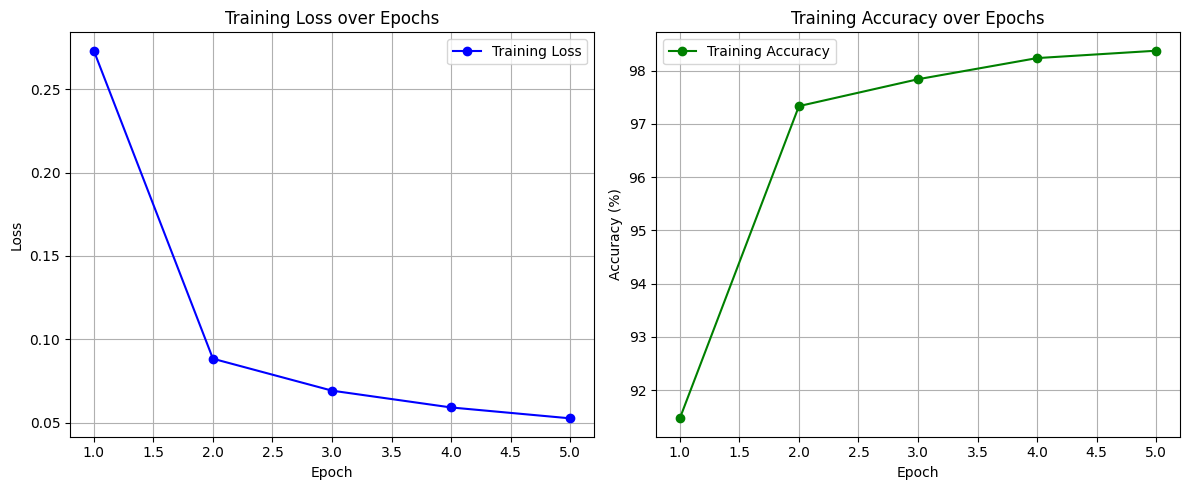

Độ chính xác trên tập test: 98.47%


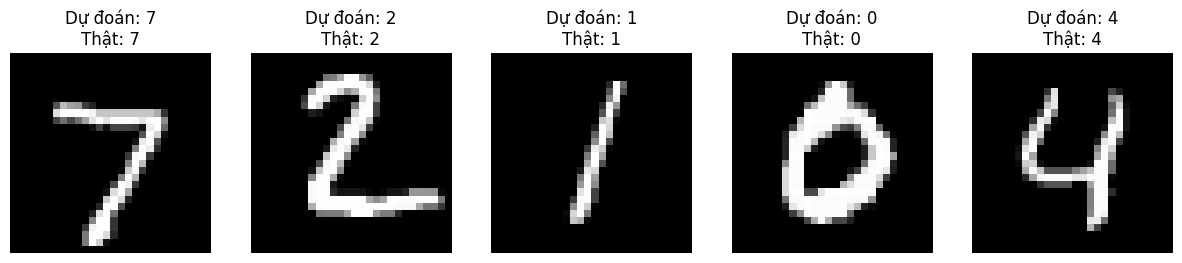

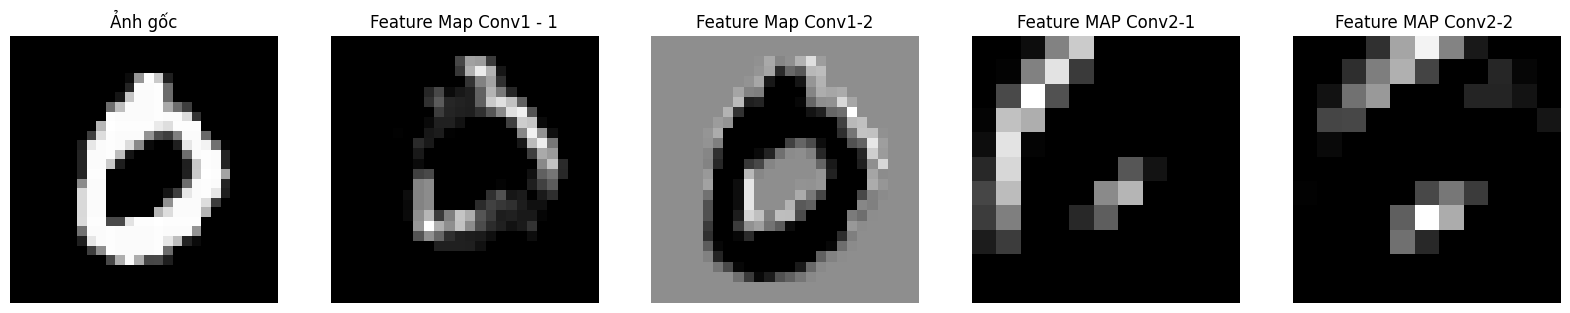

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Tải dữ liệu MNIST
transform = transforms.ToTensor()  # Chuyển ảnh thành tensor
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# 2. Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):  # Tạo lớp MNIST_CNN kế thừa từ nn.Module (lớp cơ bản của PyTorch)
    def __init__(self):  # Hàm khởi tạo mô hình
        super(MNIST_CNN, self).__init__()  # Gọi hàm khởi tạo của lớp cha (nn.Module)
        # Tầng tích chập 1: 1 kênh đầu vào (ảnh đen trắng) -> 16 kênh đầu ra, filter 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)  # Tích chập giảm kích thước từ 28x28 -> 26x26
        # Tầng tích chập 2: 16 kênh đầu vào -> 32 kênh đầu ra, filter 3x3
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Tích chập giảm từ 12x12 -> 10x10 (sau pooling)
        # Tầng pooling: vùng 2x2, giảm kích thước một nửa
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Ví dụ: 26x26 -> 13x13, 10x10 -> 5x5
        # Tầng fully connected: từ 32 kênh * 5x5 (800) -> 10 lớp (0-9)
        self.fc1 = nn.Linear(32 * 5 * 5, 10)  # Duỗi feature map thành vector rồi phân loại

    def forward(self, x):  # Hàm forward định nghĩa luồng dữ liệu qua các tầng
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU (loại giá trị âm) -> Pool (giảm kích thước)
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool, cuối cùng ra 32x5x5
        x = x.view(-1, 32 * 5 * 5)  # Duỗi tensor thành vector, -1 tự động tính batch size
        x = self.fc1(x)  # Qua tầng fully connected, ra 10 giá trị (logits cho 0-9)
        return x  # Trả về kết quả dự đoán
# Khởi tạo mô hình
model = MNIST_CNN()  # Tạo một instance của lớp 
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropy (dùng cho phân loại nhiều lớp)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Dùng SGD với learning rate 0.01 và momentum 0.9 để tối ưu
# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Chọn GPU nếu có, không thì dùng CPU
model.to(device)  # Chuyển mô hình sang thiết bị đã chọn (GPU/CPU)

# Tạo hai danh sách để lưu giá trị mất mát (loss) và độ chính xác (accuracy) qua từng epoch
loss_values = []  # Lưu mất mát trung bình của mỗi epoch để theo dõi quá trình huấn luyện
accuracy_values = []  # Lưu độ chính xác trung bình của mỗi epoch để đánh giá hiệu quả mô hình

# Huấn luyện mô hình qua 5 epoch (mỗi epoch là một lần duyệt qua toàn bộ dữ liệu huấn luyện)
for epoch in range(5):  # Lặp 5 lần, mỗi lần xử lý toàn bộ tập dữ liệu
    # Khởi tạo biến để theo dõi tổng mất mát trong epoch này
    running_loss = 0.0  # Biến này cộng dồn mất mát của các batch để tính trung bình sau
    # Khởi tạo biến để tính độ chính xác
    correct = 0  # Đếm số dự đoán đúng trong epoch
    total = 0  # Đếm tổng số mẫu được dự đoán trong epoch
    
    # Lặp qua từng batch (nhóm 64 ảnh) trong tập huấn luyện (train_loader)
    for images, labels in train_loader:  # images: tensor chứa 64 ảnh, labels: tensor chứa 64 nhãn (0-9)
        # Chuyển ảnh và nhãn sang thiết bị (GPU/CPU) để đồng bộ với mô hình
        images, labels = images.to(device), labels.to(device)  # Đảm bảo dữ liệu và mô hình cùng thiết bị
        
        # Xóa gradient cũ từ bước trước để tránh tích lũy
        optimizer.zero_grad()  # Gradient phải được đặt về 0 trước khi tính gradient mới
        # Đưa ảnh qua mô hình để nhận dự đoán (outputs là tensor chứa logits cho 10 lớp)
        outputs = model(images)  # Mô hình xử lý ảnh và trả về dự đoán
        # Tính mất mát (loss) bằng cách so sánh dự đoán (outputs) với nhãn thật (labels)
        loss = criterion(outputs, labels)  # Hàm CrossEntropyLoss đo lường sai lệch giữa dự đoán và thực tế
        # Tính gradient ngược (backpropagation) để tìm hướng tối ưu hóa trọng số
        loss.backward()  # Gradient được tính cho tất cả tham số của mô hình
        # Cập nhật trọng số của mô hình dựa trên gradient, sử dụng thuật toán SGD
        optimizer.step()  # Điều chỉnh trọng số để giảm mất mát ở bước tiếp theo
        
        # Cộng dồn giá trị mất mát của batch này (loss.item() trả về giá trị số của loss)
        running_loss += loss.item()  # Tổng hợp mất mát để tính trung bình sau
        
        # Tính độ chính xác cho batch này
        # Lấy nhãn dự đoán bằng cách chọn lớp có giá trị logits cao nhất
        _, predicted = torch.max(outputs.data, 1)  # predicted chứa nhãn dự đoán (0-9) cho 64 ảnh
        # Cộng dồn số mẫu trong batch (thường là 64, trừ batch cuối có thể ít hơn)
        total += labels.size(0)  # Tổng số ảnh đã xử lý
        # Đếm số dự đoán đúng bằng cách so sánh predicted với labels
        correct += (predicted == labels).sum().item()  # Số dự đoán đúng trong batch
    
    # Tính mất mát trung bình cho epoch bằng cách chia tổng mất mát cho số batch
    epoch_loss = running_loss / len(train_loader)  # Trung bình mất mát của tất cả batch
    # Tính độ chính xác trung bình (phần trăm) cho epoch
    epoch_accuracy = 100 * correct / total  # Tỷ lệ dự đoán đúng trên tổng số mẫu
    # Lưu giá trị mất mát và độ chính xác để vẽ biểu đồ sau này
    loss_values.append(epoch_loss)  # Thêm mất mát trung bình vào danh sách
    accuracy_values.append(epoch_accuracy)  # Thêm độ chính xác vào danh sách
    # In kết quả sau mỗi epoch để theo dõi tiến trình huấn luyện
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")  # Hiển thị mất mát và độ chính xác
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), loss_values, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), accuracy_values, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Đánh giá mô hình
correct = 0  # Đếm số dự đoán đúng
total = 0  # Đếm tổng số mẫu
with torch.no_grad():  # Tắt tính gradient vì chỉ đánh giá, không huấn luyện
    for images, labels in test_loader:  # Lặp qua từng batch trong tập kiểm tra
        images, labels = images.to(device), labels.to(device)  # Chuyển dữ liệu sang GPU/CPU
        outputs = model(images)  # Dự đoán trên batch ảnh
        _, predicted = torch.max(outputs.data, 1)  # Lấy chỉ số lớp có giá trị lớn nhất (dự đoán)
        total += labels.size(0)  # Cộng số mẫu trong batch vào tổng
        correct += (predicted == labels).sum().item()  # Cộng số dự đoán đúng
print(f"Độ chính xác trên tập test: {100 * correct / total:.2f}%")  # Tính và in độ chính xác (%)
# Trực quan kết quả dự đoán
def visualize_prediction():  # Hàm để vẽ 5 ảnh và dự đoán
    model.eval()  # Chuyển mô hình sang chế độ đánh giá (tắt dropout, batch norm nếu có)
    images, labels = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    images, labels = images.to(device), labels.to(device)  # Chuyển sang GPU/CPU
    outputs = model(images)  # Dự đoán trên batch
    _, predicted = torch.max(outputs, 1)  # Lấy chỉ số lớp dự đoán
    
    # Vẽ 5 ảnh đầu tiên
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Tạo lưới 1x5 để vẽ 5 ảnh
    for i in range(5):  # Lặp qua 5 ảnh đầu
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Vẽ ảnh (chuyển về CPU, bỏ kênh 1)
        axes[i].set_title(f"Dự đoán: {predicted[i].item()}\nThật: {labels[i].item()}")  # Ghi nhãn dự đoán và thật
        axes[i].axis('off')  # Tắt trục tọa độ
    plt.show()  # Hiển thị hình

visualize_prediction()  # Gọi hàm để vẽ
#Trực quan feature map
def visualize_feature_map():  # Hàm để vẽ ảnh gốc và feature map từ tầng conv1
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra (bỏ nhãn)
    img = images[3].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x1x28x28)
    
    # Tính feature map từ conv1
    conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU, ra tensor 1x16x26x26
    x = model.pool(conv1_output)                      # 1 × 16 × 13 × 13
    conv2_output = torch.relu(model.conv2(x))   
    # Vẽ ảnh gốc và feature map
    plt.figure(figsize=(20, 4)) 
    plt.subplot(1, 5, 1)  
    plt.title("Ảnh gốc")  
    plt.imshow(img.cpu().squeeze(), cmap='gray') 
    plt.axis('off')  
    
    # Vẽ feature map đầu tiên
    plt.subplot(1, 5, 2)  
    plt.title("Feature Map Conv1 - 1")  
    plt.imshow(conv1_output[0, 0].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off')  
    
    # Vẽ feature map thứ hai
    plt.subplot(1, 5, 3)  
    plt.title("Feature Map Conv1-2") 
    plt.imshow(conv1_output[0, 1].cpu().detach().numpy(), cmap='gray')  
    plt.axis('off') 
   

     # Hai feature map đầu của conv2
    plt.subplot(1, 5, 4)
    plt.imshow(conv2_output[0, 0].cpu().detach(), cmap='gray')
    plt.title("Feature MAP Conv2-1");  
    plt.axis('off') 

    plt.subplot(1, 5, 5)
    plt.imshow(conv2_output[0, 1].cpu().detach(), cmap='gray')
    plt.title("Feature MAP Conv2-2 "); 
    plt.axis('off') 

    plt.show() 
visualize_feature_map()  

### Trả lời:
- Feature map tầng conv1 thể hiện rõ các cạnh, đường viền — giúp phát hiện đặc trưng cơ bản.
- Feature map tầng conv2 biểu diễn đặc trưng trừu tượng hơn như hình dạng hoặc tổng thể ký tự — ít chi tiết nhỏ, nhưng nổi bật về bố cục.
- Mỗi tầng tích chập học các mức đặc trưng khác nhau. Càng đi sâu, đặc trưng càng khái quát và trừu tượng hơn.


## Nộp bài
- Nộp file Jupyter Notebook (.ipynb) lên github.
- Mỗi câu cần có:
  - Code đã sửa đổi.
  - Kết quả chạy (độ chính xác, biểu đồ loss, hình feature map nếu có).
  - Giải thích ngắn gọn (2-3 câu).

## Gợi ý
- Đọc lại lý thuyết CNN (tích chập, ReLU, pooling, fully connected) để hiểu tác động của từng thay đổi.
- Chạy code từng phần để kiểm tra lỗi (ví dụ: kiểm tra kích thước tensor sau khi thêm `conv3`).

## Thời hạn nộp bài
- Nộp bài trước buổi học tiếp theo.
